In [31]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='356303e0-458a-4400-810d-88442dccc2d2', project_access_token='p-3ccd6758d2ea92e25c2ff82ff23cc39c79afd4e7')
pc = project.project_context


# Loading Libraries

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from random import sample  
from sklearn.linear_model import LogisticRegression  
from sklearn import tree  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import *  
from sklearn import metrics  
from IPython.display import Image  
import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

# Preprocessing Data

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_b66d75cd243043b8ac36de03c3f60fa4 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_b66d75cd243043b8ac36de03c3f60fa4 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_b66d75cd243043b8ac36de03c3f60fa4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='N_gopbW8UXHWMXtkre6OaHBdzBUzGMK-O2iGG3IZEw5Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_b66d75cd243043b8ac36de03c3f60fa4)

body = client_b66d75cd243043b8ac36de03c3f60fa4.get_object(Bucket='cdcproject-donotdelete-pr-z77cerwxydkvs0',Key='dataset1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,0,0.1,0.2,0.3,0.4,1.71,0.5,0.6,1,0.54,0.7,1.1,0.8,0.9,1.2,0.10,280,0.11,0.12,0.13
0,0,0,0,0,0,0.13,1,0,1.00,0.96,0.71,1,0,0,1,0,170.433333,0,0,0
1,0,0,0,0,0,9.26,1,0,0.75,0.68,0.22,0,0,0,1,0,377.466667,0,0,0
2,0,0,0,0,0,7.79,1,0,0.00,0.09,1.00,0,0,0,1,0,328.733333,0,0,0
3,0,0,0,0,0,4.04,1,0,0.00,0.08,0.57,0,0,0,1,0,267.833333,0,0,0
4,0,0,0,0,0,4.06,1,0,0.93,0.44,0.72,0,0,0,1,0,340.933333,0,0,0


## Adding column names and standardizing data

In [5]:
#adding column names
headers = ['url having ip', 'sslfinal_state', 'url_short', 'having_at_symbol', 'doubleslash', 'domain_registation_length'
                   , 'favicon', 'https_token', 'request_url', 'url_of_anchor', 'links_in_tags', 'sfh', 'submitting_to_email',
                   'abnormal url', 'redirect', 'iframe', 'age_of_domain', 'web_traffic', 'statistical_report', 'target']
df.columns = headers

#standardizing data
print(df['age_of_domain'].max())
df['age_of_domain'] = df['age_of_domain']/df['age_of_domain'].max()
df['age_of_domain'] = round(df['age_of_domain'],2)


438.33333333333326


## Feature Selection

In [6]:
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) 
y_train = train['target']  
x_train = train.drop(['target'], axis=1)  
y_test = test['target']  
x_test = test.drop(['target'], axis=1)  
y_validate = validate['target']  
x_validate = validate.drop(['target'], axis=1)
rf = RandomForestClassifier()  
rf.fit(x_train, y_train)  
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True)) 

Features sorted by their score:
[(0.4904, 'web_traffic'), (0.2003, 'age_of_domain'), (0.0784, 'sslfinal_state'), (0.0602, 'domain_registation_length'), (0.057, 'url_of_anchor'), (0.0488, 'links_in_tags'), (0.0211, 'request_url'), (0.0209, 'redirect'), (0.0106, 'sfh'), (0.0066, 'favicon'), (0.0042, 'url_short'), (0.0014, 'abnormal url'), (0.0001, 'having_at_symbol'), (0.0, 'url having ip'), (0.0, 'submitting_to_email'), (0.0, 'statistical_report'), (0.0, 'iframe'), (0.0, 'https_token'), (0.0, 'doubleslash')]


## Creating dataset with reduced feature set (top 7)

In [7]:
all_vars = x_train.columns.tolist()
top_vars = ['web_traffic', 'sslfinal_state', 'age_of_domain', 'url_of_anchor', 'domain_registation_length', 'redirect', 'links_in_tags']
bottom_vars = [cols for cols in all_vars if cols not in top_vars]
x_train    = x_train.drop(bottom_vars, axis=1)  
x_test     = x_test.drop(bottom_vars, axis=1)  
x_validate = x_validate.drop(bottom_vars, axis=1) 

# Training different machine learning model

## Logistic Regression

In [8]:
logit_model = LogisticRegression()  

logit_model = logit_model.fit(x_train, y_train)  

logit_model.score(x_train, y_train)  

predicted = pd.DataFrame(logit_model.predict(x_test))  

probs = pd.DataFrame(logit_model.predict_proba(x_test))  

logit_accuracy = metrics.accuracy_score(y_test, predicted)  
logit_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
logit_classification_report = metrics.classification_report(y_test, predicted)  
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

logit_cv_scores = cross_val_score(LogisticRegression(), x_test, y_test, scoring='precision', cv=10)  
logit_cv_mean = np.mean(logit_cv_scores) 

## Decision Trees

In [9]:
# Instantiate with a max depth of 3
tree_model = tree.DecisionTreeClassifier(max_depth=3)  
# Fit a decision tree
tree_model = tree_model.fit(x_train, y_train)  
# Training accuracy
tree_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))  
probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)  
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
tree_classification_report = metrics.classification_report(y_test, predicted)  
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)
tree_cv_mean = np.mean(tree_cv_scores)  

## Random Forest

In [10]:
# Instantiate
rf = RandomForestClassifier()  
# Fit
rf_model = rf.fit(x_train, y_train)  
# training accuracy 99.74%
rf_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))  
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)  
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
rf_classification_report = metrics.classification_report(y_test, predicted)  
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)  
rf_cv_mean = np.mean(rf_cv_scores)

## SVM 

In [11]:
# Instantiate
svm_model = SVC(probability=True)  
# Fit
svm_model = svm_model.fit(x_train, y_train)  
# Accuracy
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))  
probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)  
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
svm_classification_report = metrics.classification_report(y_test, predicted)  
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)  
svm_cv_mean = np.mean(svm_cv_scores)  

## KNN

In [12]:
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)  
# fit the model
knn_model.fit(x_train, y_train)  
# Accuracy
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))  
probs = pd.DataFrame(knn_model.predict_proba(x_test))

# Store metrics
knn_accuracy = metrics.accuracy_score(y_test, predicted)  
knn_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
knn_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
knn_classification_report = metrics.classification_report(y_test, predicted)  
knn_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
knn_recall = metrics.recall_score(y_test, predicted, pos_label=1)

knn_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)  
knn_cv_mean = np.mean(knn_cv_scores)  

## Naive Bayes

In [13]:
# Instantiate
bayes_model = GaussianNB()  
# Fit the model
bayes_model.fit(x_train, y_train)  
# Accuracy
bayes_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(bayes_model.predict(x_test))  
probs = pd.DataFrame(bayes_model.predict_proba(x_test))

# Store metrics
bayes_accuracy = metrics.accuracy_score(y_test, predicted)  
bayes_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
bayes_classification_report = metrics.classification_report(y_test, predicted)  
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
bayes_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)  
bayes_cv_mean = np.mean(bayes_cv_scores) 

# Model Comparison

In [24]:
# Model comparison
models = pd.DataFrame({  
  'Model': ['Logistic', 'd.Tree', 'r.f.', 'SVM', 'kNN',  'Bayes'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, bayes_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, svm_precision, knn_precision, bayes_precision],
  'recall' : [logit_recall, tree_recall, rf_recall, svm_recall, knn_recall, bayes_recall],
  'F1' : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1, bayes_f1],
  'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean, bayes_cv_mean]
}, index=['Logistic','D.Tree','r.f','SVM','kNN','Bayes'])
# Print table and sort by test precision
models.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision,recall,F1,cv_precision
kNN,kNN,1.000000,1.000000,1.000000,1.000000,0.966667
Logistic,Logistic,0.989899,0.982456,1.000000,0.991150,0.966667
SVM,SVM,0.989899,0.982456,1.000000,0.991150,1.000000
Bayes,Bayes,0.989899,0.982456,1.000000,0.991150,0.966667
D.Tree,d.Tree,0.979798,0.982143,0.982143,0.982143,0.985714
r.f,r.f.,0.979798,0.982143,0.982143,0.982143,0.985714


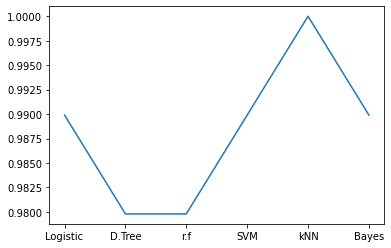

In [25]:
models['Accuracy'].plot()

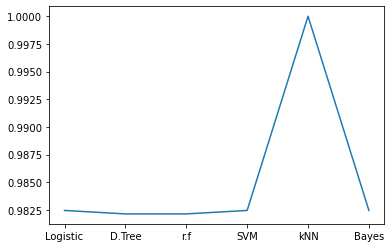

In [28]:
models['Precision'].plot()

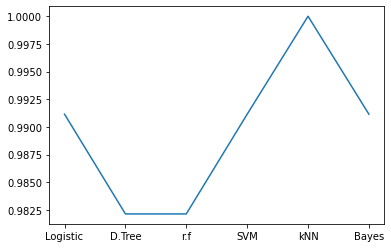

In [29]:
models['F1'].plot()

# Save reduced dataset (insert project token from settings)

In [32]:
all_columns = df.columns.tolist()
columns_to_keep = ['web_traffic', 'sslfinal_state', 'age_of_domain', 'url_of_anchor', 'domain_registation_length', 'redirect', 'links_in_tags', 'target']
columns_not_to_keep = [cols for cols in all_columns if cols not in columns_to_keep]
df1 = df.drop(columns_not_to_keep, axis=1)

project.save_data(data=df1.to_csv(index=False),file_name='dataset2.csv',overwrite=True)

{'file_name': 'dataset2.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'cdcproject-donotdelete-pr-z77cerwxydkvs0',
 'asset_id': 'f3fc7191-191e-4daf-8723-c3341648c4f3'}